<a href="https://colab.research.google.com/github/Abhinavk910/Deep-Learning/blob/master/Neural%20Network%20in%20Numpy/Built_2_layer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries


In [0]:
import numpy as np
from matplotlib import pyplot as plt

# Loading Data

In [0]:
X = np.load('X.npy')
y = np.load('Y.npy')

In [4]:
print(X.shape, y.shape)

(2, 400) (1, 400)


##Plotting Data

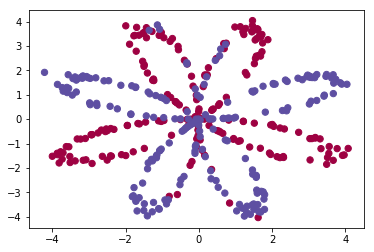

In [5]:
plt.scatter(X[0, :], X[1, :], c=y.reshape((-1,)), s=40, cmap=plt.cm.Spectral);

# Building Neural Network

In [0]:
np.random.seed(42)

class nn():
  
  def __init__(self, X, Y = np.zeros(0), hidden_neuron = 4, learning_rate = 0.1, epoch = 1, batch_size = 32, iteration = 1, print_cost = True):
    self.X = X
    self.y = Y
    self.learning_rate = learning_rate
    self.n_h = hidden_neuron
    self.n_x = X.shape[0]
    self.n_y = y.shape[0]
    self.noi = iteration
    self.epoch = epoch
    self.batch_size = batch_size
    self.pc = print_cost
    
  def sigmoid(self, Z, differ = False):
    A = 1 / (1 + np.exp(-Z))
    if differ:
      A = A * (1 - A)
    return A
  
  def tanh(self, Z, differ = False):
    A = np.tanh(Z)
    if differ:
      A = 1 - np.square(A)
    return A
  
  def initialize_parameters(self):
    W1 = np.random.randn(self.n_h, self.n_x) * 0.01
    b1 = np.zeros((self.n_h, 1))
    W2 = np.random.randn(self.n_y, self.n_h) * 0.01
    b2 = np.zeros((self.n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters
  
  def forward_propogation(self, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = W1.dot(self.X) + b1
    A1 = self.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = self.sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return cache
  
  def compute_cost(self, cache):
    m = self.y.shape[1]
    A = cache['A2']
    cost = np.sum((-1 / m) * (self.y * np.log(A) + (1 - self.y) * (np.log(1 - A))))
    return cost
  
  def backpropogation(self, cache, parameters):
    m = self.X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = cache['Z1']
    Z2 = cache['Z2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = (((1 - self.y) / (1 - A2) - (self.y / A2)) * self.sigmoid(Z2, differ = True))
    dW2 = dZ2.dot(A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / m
    dZ1 = W2.T.dot(dZ2) * self.tanh(Z1, differ = True)
    dW1 = dZ1.dot(self.X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
           
    return grads
           
  def update_parameter(self, parameters, grads):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - self.learning_rate * dW1
    b1 = b1 - self.learning_rate * db1
    W2 = W2 - self.learning_rate * dW2
    b2 = b2 - self.learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
  
  def fit(self, parameter = {}):
    if not parameter:
      parameters = self.initialize_parameters()
    else:
      parameters = parameter
    for i in range(0, self.noi):
        cache = self.forward_propogation(parameters)
        cost = self.compute_cost(cache)
        grads = self.backpropogation( cache, parameters)
        parameters = self.update_parameter(parameters, grads)
        if self.pc and self.noi != 1 and i % 1000 == 0:
          print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
  
  def predict(self, parameters):
    cache = self.forward_propogation(parameters)
    predictions = np.where(cache['A2'] > 0.5, 1, 0)
    return predictions
  
  def accuracy(self, predictions):
     return 100 -  np.sum(np.abs(predictions - self.y)) / self.y.shape[1] * 100
    
    

  def generate_batch(self):
    indices = np.arange(self.X.shape[1])
    batch = []
    np.random.shuffle(indices)
    for i in indices:
      batch.append(i)
      if len(batch) == self.batch_size:
        yield self.X[:,batch], self.y[:,batch]
        batch = []
  
  def start(self):
    costs = {}
    parameters = self.initialize_parameters()
    for e in range(self.epoch):
      if self.pc:
        print(f'epoch - {e+1}')
      batch = self.generate_batch()
      
      for i, (X_batch, y_batch) in enumerate(batch):
        if self.pc:
          print('\r',f'batch no. {i+1}/{self.X.shape[1]//self.batch_size}', end = " ")
        model = nn(X_batch, y_batch, hidden_neuron = self.n_h, learning_rate = self.learning_rate, iteration = self.noi, print_cost = self.pc)
        para = model.fit(parameter = parameters)
        parameters = para
        
      model = nn(X, y, hidden_neuron = self.n_h, learning_rate = self.learning_rate)
      cache = model.forward_propogation(parameters = parameters)
      cost = model.compute_cost(cache)
      costs[cost] = parameters
      if self.pc:
        print(f'Cost :- {cost}')
    return costs, parameters
  
  def decision_boundary(self, parameter):
    x_min, x_max = self.X[0, :].min() - 1, self.X[0, :].max() + 1
    y_min, y_max = self.X[1, :].min() - 1, self.X[1, :].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.1))

    Z = nn(np.c_[xx.ravel(), yy.ravel()].T).predict(parameters)
    Z = Z.reshape(xx.shape)

#     plt.figure(figsize = (5,5))
    plt.contourf(xx, yy, Z, cmap =  plt.cm.Spectral, alpha = 0.5)
    plt.contour(xx, yy, Z, colors = 'k', linewidths = 0.1)
    plt.scatter(self.X[0, :], self.X[1, :], c = self.y.reshape((-1,)), s=40, cmap=plt.cm.Spectral)

## Runnig Neural Netwrok

epoch - 1
 batch no. 50/50 Cost :- 0.7272918846942245
epoch - 2
 batch no. 50/50 Cost :- 0.7558097435576635
epoch - 3
 batch no. 50/50 Cost :- 0.6888961428730663
epoch - 4
 batch no. 50/50 Cost :- 0.7984375994208263
epoch - 5
 batch no. 50/50 Cost :- 0.6401188093318454
epoch - 6
 batch no. 50/50 Cost :- 0.6236788241785295
epoch - 7
 batch no. 50/50 Cost :- 0.38327082719634054
epoch - 8
 batch no. 50/50 Cost :- 0.3625809215845329
epoch - 9
 batch no. 50/50 Cost :- 0.3493370799206109
epoch - 10
 batch no. 50/50 Cost :- 0.4727461904136519
epoch - 11
 batch no. 50/50 Cost :- 0.33128651229224493
epoch - 12
 batch no. 50/50 Cost :- 0.3316932602011033
epoch - 13
 batch no. 50/50 Cost :- 0.36711413232790885
epoch - 14
 batch no. 50/50 Cost :- 0.4075704894688653
epoch - 15
 batch no. 50/50 Cost :- 0.3027480601563255
epoch - 16
 batch no. 50/50 Cost :- 0.31127485992045856
epoch - 17
 batch no. 50/50 Cost :- 0.3444548018442307
epoch - 18
 batch no. 50/50 Cost :- 0.29821460458993576
epoch - 19
 ba

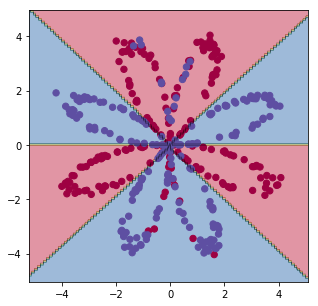


 Acuracy is - 88.0


In [7]:
Model = nn(X, y, hidden_neuron = 30, learning_rate = 1.2, epoch = 500, batch_size = 8, print_cost = True)
cost, parameters = Model.start()
prediction = Model.predict(parameters)

Model.decision_boundary(parameters)
print(f'\n Acuracy is - {Model.accuracy(prediction)}')

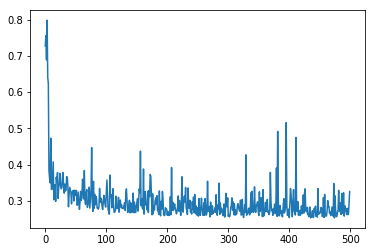

In [8]:
from matplotlib import pyplot as plt
plt.plot(cost.keys())

In [0]:
# best parameter
import operator
parameter = sorted(cost.items(), key = operator.itemgetter(0), reverse = False)[0][1]

In [10]:
# Predicting accuracy on 
prediction = Model.predict(parameter)
Model.accuracy(prediction)

89.75

Accuracy for 5 hidden units: 90.75 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.5 %
Accuracy for 100 hidden units: 91.5 %


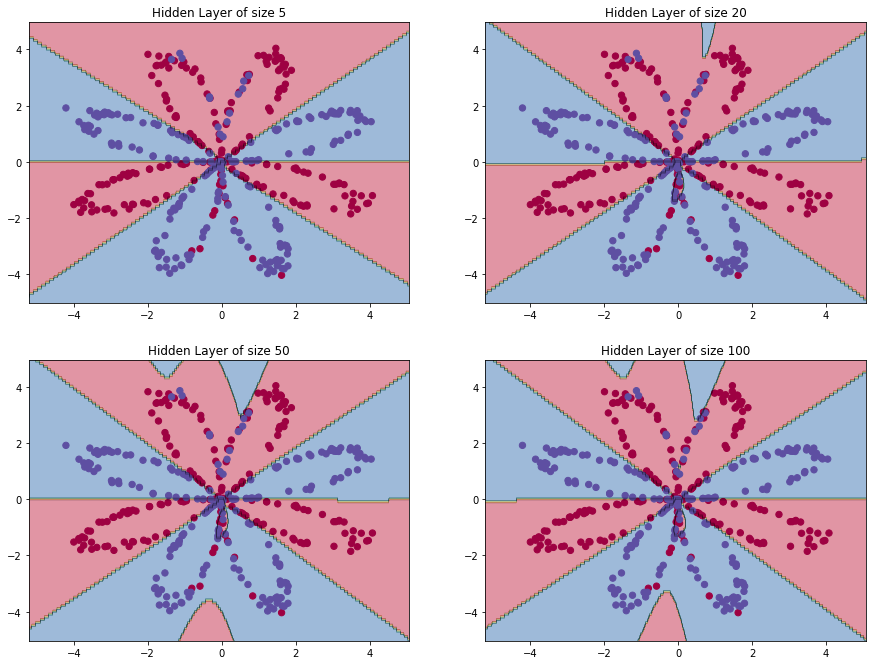

In [22]:
plt.figure(figsize=(15, 30))
hidden_layer_sizes = [5,20, 50, 100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    model = nn(X, y, n_h, iteration = 5000, learning_rate = 1, epoch = 1, batch_size = X.shape[1], print_cost = False)
    cost, parameters = model.start()
    prediction = model.predict(parameters)
    accuracy = model.accuracy(prediction)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    model.decision_boundary(parameters)